In [1]:
# Principal Component Analysis on Cancer Dataset
# Anderson Cancer Center Data Analysis Project
# Project Submitted by : Abdullahi Mohamed Jibril
# Data : 04-21-2025

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [3]:
# Load the breast cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

In [4]:
# Display basic information about the dataset
print(f"Dataset shape: {X.shape}")
print(f"Feature names: {cancer.feature_names}")
print(f"Target names: {cancer.target_names}")
print(f"Class distribution: {np.bincount(y)}")

Dataset shape: (569, 30)
Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Target names: ['malignant' 'benign']
Class distribution: [212 357]


In [5]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


**# Step 1: Implement PCA**

In [6]:
pca = PCA()
pca.fit(X_scaled)

PCA()

In [7]:
# Analyze the explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

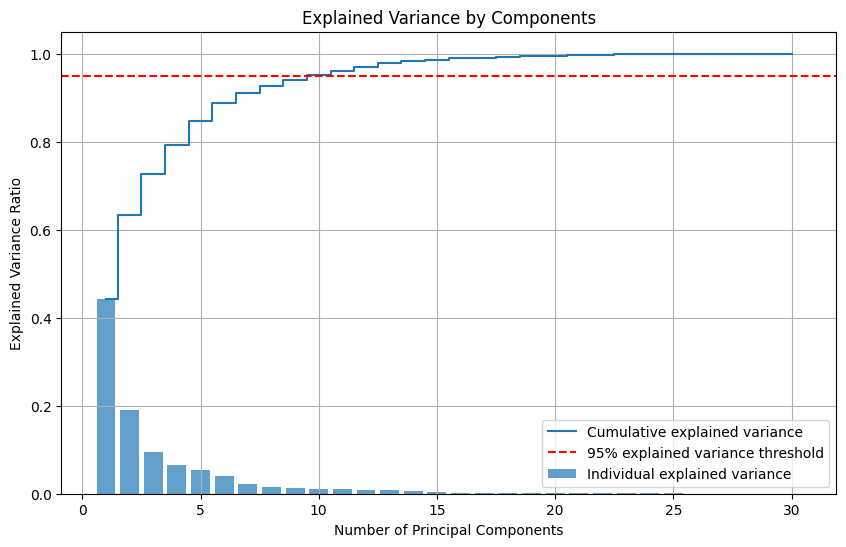

In [8]:
# Plot explained variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, label='Individual explained variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative explained variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% explained variance threshold')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Components')
plt.legend()
plt.grid(True)
plt.savefig('explained_variance.png')
plt.show()

**# Step 2: Reduce dimensionality to 2 PCA components**

In [9]:
pca_2 = PCA(n_components=2)
X_pca = pca_2.fit_transform(X_scaled)

In [10]:
# Show the explained variance with 2 components
print(f"Explained variance with 2 components: {sum(pca_2.explained_variance_ratio_):.4f}")
print(f"Individual explained variance: {pca_2.explained_variance_ratio_}")

Explained variance with 2 components: 0.6324
Individual explained variance: [0.44272026 0.18971182]


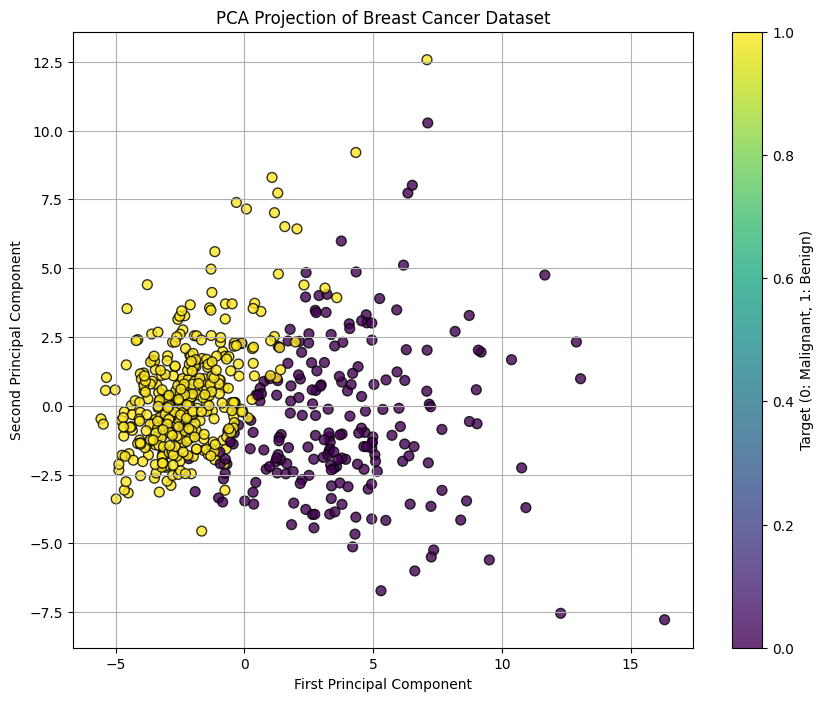

In [11]:
# Visualize the 2D projection
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.8, edgecolors='k', s=50)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Projection of Breast Cancer Dataset')
plt.colorbar(scatter, label='Target (0: Malignant, 1: Benign)')
plt.grid(True)
plt.savefig('pca_projection.png')
plt.show()

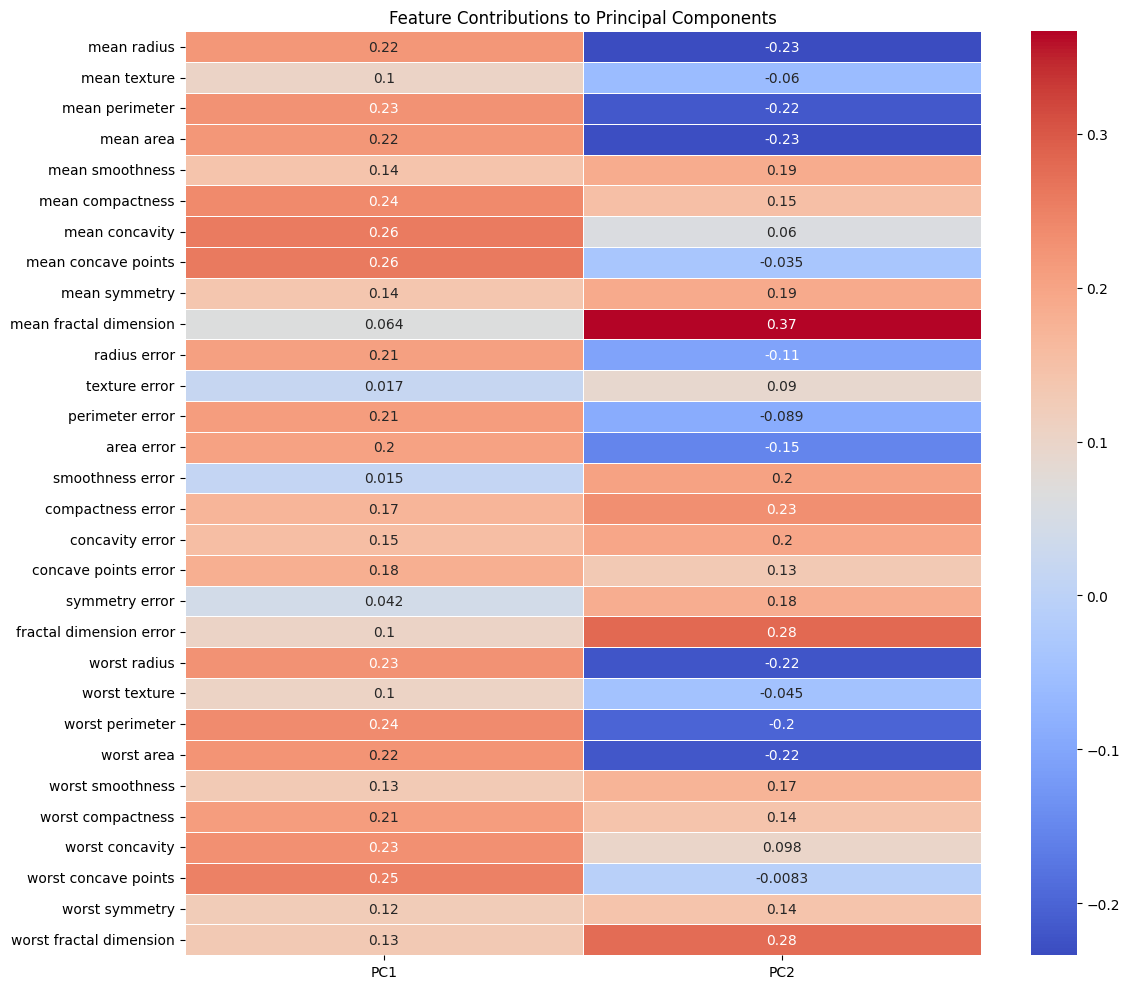

In [12]:
# Analyze feature contributions to principal components
components_df = pd.DataFrame(pca_2.components_.T, columns=['PC1', 'PC2'], index=cancer.feature_names)
plt.figure(figsize=(12, 10))
sns.heatmap(components_df, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Contributions to Principal Components')
plt.tight_layout()
plt.savefig('feature_contributions.png')
plt.show()

In [13]:
# Print the top 5 contributing features for each component
print("\nTop 5 features contributing to PC1:")
print(components_df['PC1'].abs().sort_values(ascending=False).head(5))
print("\nTop 5 features contributing to PC2:")
print(components_df['PC2'].abs().sort_values(ascending=False).head(5))


Top 5 features contributing to PC1:
mean concave points     0.260854
mean concavity          0.258400
worst concave points    0.250886
mean compactness        0.239285
worst perimeter         0.236640
Name: PC1, dtype: float64

Top 5 features contributing to PC2:
mean fractal dimension     0.366575
fractal dimension error    0.280092
worst fractal dimension    0.275339
mean radius                0.233857
compactness error          0.232716
Name: PC2, dtype: float64


**# Step 3: Implement Logistic Regression**

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

In [15]:
# Train a logistic regression model
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [16]:
# Make predictions
y_pred = lr.predict(X_test)


In [18]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f"\nLogistic Regression Accuracy: {accuracy:.4f}")
print(f"\nConfusion Matrix:\n{conf_matrix}")
print(f"\nClassification Report:\n{class_report}")


Logistic Regression Accuracy: 0.9708

Confusion Matrix:
[[ 60   3]
 [  2 106]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        63
           1       0.97      0.98      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



In [19]:
# Visualize the decision boundary
plt.figure(figsize=(10, 8))
# Create a mesh grid
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

<Figure size 1000x800 with 0 Axes>

In [20]:
# Predict on the mesh grid
Z = lr.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

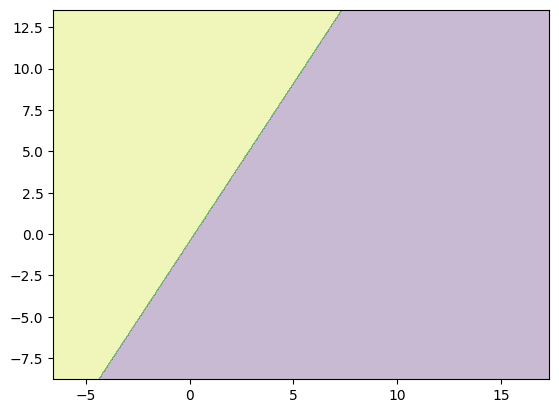

In [21]:
# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

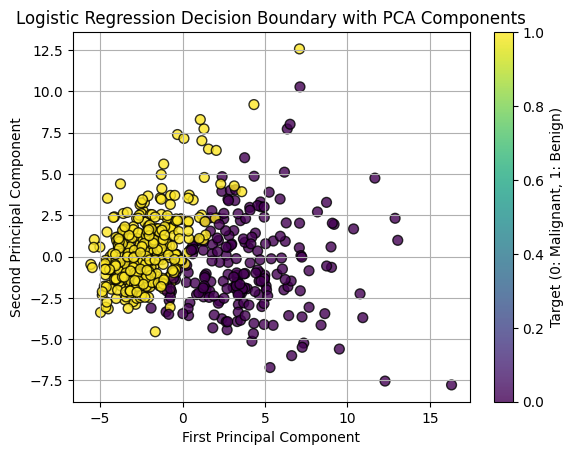

In [22]:
# Plot the data points
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolors='k', alpha=0.8, s=50)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Logistic Regression Decision Boundary with PCA Components')
plt.colorbar(scatter, label='Target (0: Malignant, 1: Benign)')
plt.grid(True)
plt.savefig('decision_boundary.png')
plt.show()

In [24]:
# Save PCA coordinates with original target for reference
pca_df = pd.DataFrame({
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    'Target': y
})
pca_df.to_csv('pca_results.csv', index=False)

print("\nAnalysis completed! All results have been saved.")


Analysis completed! All results have been saved.
